# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\SINASC_RO_2019.csv")
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
df.loc[:,'Latitude'] = df['munResLat'].apply(lambda x: 'acima de -10,5' if x > (-10.5) else 'abaixo de -10,5')
pd.options.display.float_format = '{:.2f}'.format
df.groupby('Latitude')[['munResArea','QTDGESTANT']].agg(['sum','mean','min','max','std','var'])

munResArea                                                 \
                         sum     mean    min      max      std          var   
Latitude                                                                      
abaixo de -10,5  83601434.28  6434.34 459.98 24855.72  5688.82  32362697.56   
acima de -10,5  313771135.02 22357.93 965.68 34096.39 14488.91 209928494.89   

                QTDGESTANT                            
                       sum mean  min   max  std  var  
Latitude                                              
abaixo de -10,5   15303.00 1.19 0.00 15.00 1.30 1.70  
acima de -10,5    17615.00 1.36 0.00 52.00 1.49 2.23

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
df.loc[:,'Area'] = df['munResArea'].apply(lambda x: 'acima de 3000' if x > (3000) else 'abaixo de 3000')
df.groupby('Area')[['STCESPARTO','MESPRENAT']].agg(['sum','mean','min','max','median','std','var'])

STCESPARTO                                 MESPRENAT            \
                      sum mean  min  max median  std  var       sum mean  min   
Area                                                                            
abaixo de 3000   10718.00 2.08 1.00 9.00   2.00 1.10 1.21  19206.00 3.82 1.00   
acima de 3000    49630.00 2.35 1.00 9.00   2.00 1.41 1.98 177209.00 9.26 1.00   

                                          
                 max median   std    var  
Area                                      
abaixo de 3000 99.00   2.00 12.09 146.23  
acima de 3000  99.00   2.00 24.59 604.53

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
df['Res_Alt'] = pd.cut(df['munResAlt'], bins=3)
df.groupby('Res_Alt')[['TPMETESTIM','TPNASCASSI']].agg(['sum','mean','median','max','min','std','var'])

TPMETESTIM                                 TPNASCASSI       \
                      sum mean median  max  min  std  var        sum mean   
Res_Alt                                                                     
(84.49, 255.0]  142877.00 6.49   8.00 9.00 1.00 2.99 8.92   26742.00 1.16   
(255.0, 425.0]   15648.00 7.14   8.00 9.00 1.00 2.21 4.86    2374.00 1.06   
(425.0, 595.0]   10451.00 6.59   8.00 9.00 1.00 2.60 6.74    1793.00 1.13   

                                           
               median  max  min  std  var  
Res_Alt                                    
(84.49, 255.0]   1.00 9.00 1.00 0.43 0.19  
(255.0, 425.0]   1.00 9.00 1.00 0.37 0.14  
(425.0, 595.0]   1.00 9.00 1.00 0.41 0.17

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [7]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [8]:
df['Res_nome'] = df['munResNome'].map(intermediarias)

<li>Como o gráfico diário é de difícil interpretação, subi um pouco a granualidade dos dados para a análise

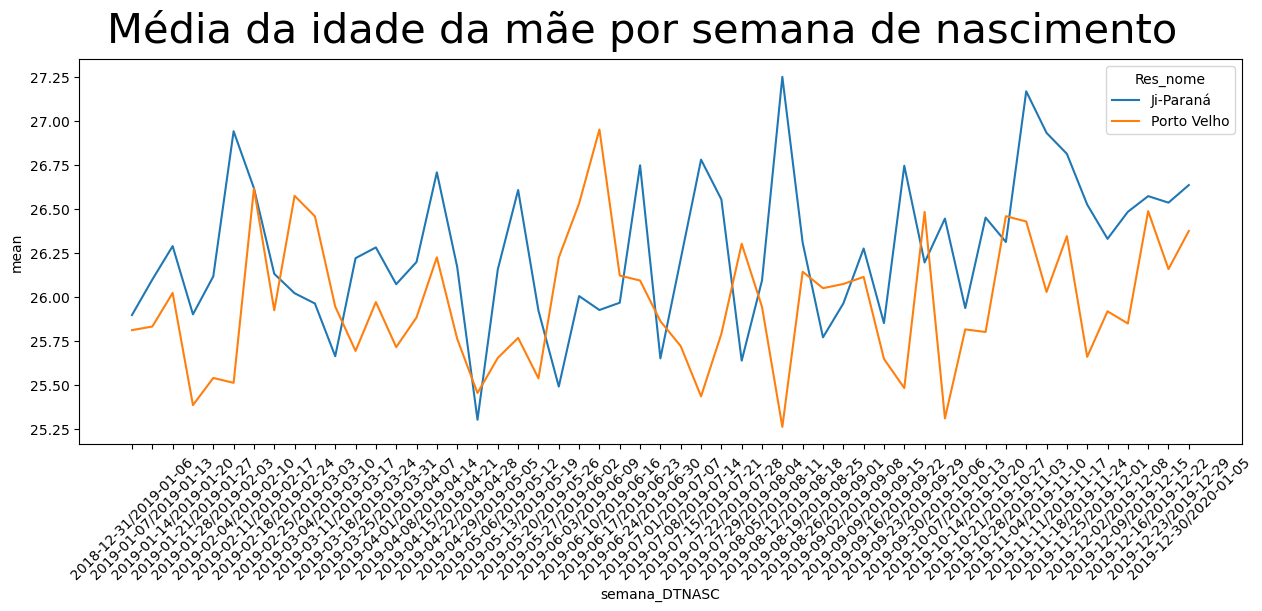

In [9]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df.loc[:,'semana_DTNASC'] = df['DTNASC'].dt.to_period('W')
df_imagem_1 = df.groupby(['Res_nome','semana_DTNASC'])[['IDADEMAE']].agg(['mean'])
df_imagem_1 = df_imagem_1.reset_index()



figura = plt.figure(figsize=(15,5))
plt.suptitle('Média da idade da mãe por semana de nascimento', fontsize=30)
linha = sns.lineplot(x=df_imagem_1['semana_DTNASC'].astype(str),y=df_imagem_1['IDADEMAE']['mean'], hue=df_imagem_1['Res_nome'])
plt.xticks(rotation=45);

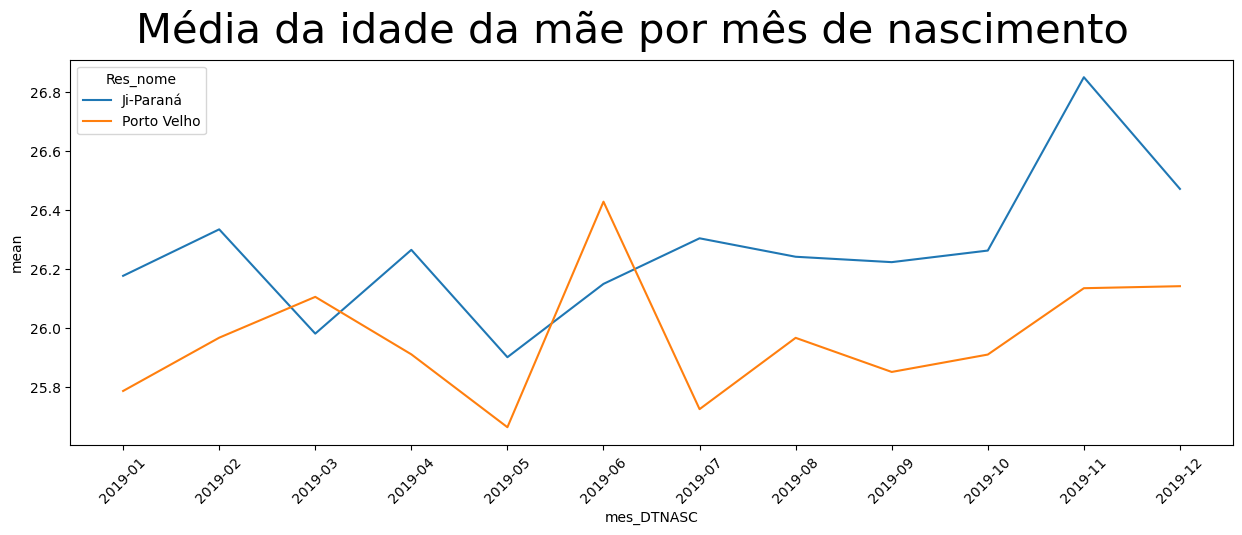

In [10]:
df.loc[:,'mes_DTNASC'] = df['DTNASC'].dt.to_period('M')
df_imagem_1 = df.groupby(['Res_nome','mes_DTNASC'])[['IDADEMAE']].agg(['mean'])
df_imagem_1 = df_imagem_1.reset_index()

figura = plt.figure(figsize=(15,5))
plt.suptitle('Média da idade da mãe por mês de nascimento', fontsize=30)
linha = sns.lineplot(x=df_imagem_1['mes_DTNASC'].astype(str),y=df_imagem_1['IDADEMAE']['mean'], hue=df_imagem_1['Res_nome'])
plt.xticks(rotation=45);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [11]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M" # URL da página
df_IDH = pd.read_html(url)[0] # Importar tabela
df_IDH.columns = [i[1] for i in df_IDH.columns] # Mudar nome de colunas
df_IDH.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736,0.764,0.819,0.638
3,2,Vilhena,0.731,0.734,0.808,0.659
4,3,Cacoal,0.718,0.727,0.821,0.620


In [12]:
def idh(x):
    if x < 10:
        return 'IDH-M alto'
    elif (x>=10) & (x < 47):
        return 'IDH-M médio'
    elif x >= 46:
        return 'IDH-M baixo'
    
df_IDH['nivel_IDH'] = pd.Series(df_IDH.index).apply(lambda x: idh(x)) # Criar uma coluna com o nível de IDH
df_IDH = df_IDH.drop(axis=1,index=[0,1,9,46,56,57]) # Deletar linhas erradas
df_IDH.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,nivel_IDH
2,1,Porto Velho,0.736,0.764,0.819,0.638,IDH-M alto
3,2,Vilhena,0.731,0.734,0.808,0.659,IDH-M alto
4,3,Cacoal,0.718,0.727,0.821,0.620,IDH-M alto
5,4,Ji-Paraná,0.714,0.728,0.810,0.617,IDH-M alto
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613,IDH-M alto


In [13]:
# Verificar o formato.
df_IDH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 55
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Posição          52 non-null     object
 1   Município        52 non-null     object
 2   IDH municipal    52 non-null     object
 3   IDH renda        52 non-null     object
 4   IDH longevidade  52 non-null     object
 5   IDH educação     52 non-null     object
 6   nivel_IDH        52 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [14]:
# Alterar o formato de object para float.
df_IDH[['IDH municipal','IDH renda','IDH longevidade','IDH educação']] = df_IDH[['IDH municipal','IDH renda','IDH longevidade','IDH educação']].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ORIGEM         27028 non-null  int64         
 1   CODESTAB       26913 non-null  float64       
 2   CODMUNNASC     27028 non-null  int64         
 3   LOCNASC        27028 non-null  int64         
 4   IDADEMAE       27028 non-null  int64         
 5   ESTCIVMAE      26711 non-null  float64       
 6   ESCMAE         26716 non-null  object        
 7   CODOCUPMAE     24121 non-null  float64       
 8   QTDFILVIVO     25455 non-null  float64       
 9   QTDFILMORT     24930 non-null  float64       
 10  CODMUNRES      27028 non-null  int64         
 11  GESTACAO       25796 non-null  object        
 12  GRAVIDEZ       26949 non-null  object        
 13  PARTO          26979 non-null  object        
 14  CONSULTAS      27028 non-null  int64         
 15  DTNASC         2702

In [16]:
df_IDH['região'] = (df_IDH['Município'].map(intermediarias)) # Passando a função map para separar as regiões.
df_IDH.groupby(['região','nivel_IDH'])[['IDH renda','IDH longevidade','IDH municipal']].agg(['mean','max','min','std','count'])

IDH renda                      IDH longevidade       \
                             mean  max  min  std count            mean  max   
região      nivel_IDH                                                         
Ji-Paraná   IDH-M alto       0.72 0.73 0.71 0.01     5            0.81 0.82   
            IDH-M baixo      0.62 0.64 0.60 0.02     3            0.77 0.78   
            IDH-M médio      0.65 0.69 0.60 0.02    20            0.79 0.82   
Porto Velho IDH-M alto       0.74 0.76 0.72 0.03     2            0.81 0.82   
            IDH-M baixo      0.63 0.67 0.62 0.02     5            0.76 0.77   
            IDH-M médio      0.66 0.69 0.63 0.02    10            0.79 0.82   

                                        IDH municipal                       
                         min  std count          mean  max  min  std count  
região      nivel_IDH                                                       
Ji-Paraná   IDH-M alto  0.80 0.01     5          0.71 0.73 0.70 0.01     5  
            IDH-M baixo 0.75 0.01     3          0.59 0.60 0.59 0.01     3  
            IDH-M médio 0.75 0.02    20          0.64 0.69 0.61 0.03    20  
Porto Velho IDH-M alto  0.81 0.01     2          0.72 0.74 0.70 0.02     2  
            IDH-M baixo 0.76 0.01     5          0.59 0.60 0.58 0.00     5  
            IDH-M médio 0.75 0.03    10          0.64 0.69 0.61 0.03    10

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [17]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
df_IFDM = pd.read_html(url)[0]
df_IFDM.columns = [i[0] for i in df_IFDM.columns]
df_IFDM.head()

def IFDM(x):
    if x <= 27:
        return 'Desenvolvimento moderado'
    else:
        return 'Desenvolvimento Regular'

df_IFDM['Nível_desenvolvimento'] = pd.Series(df_IFDM.index).apply(lambda x: IFDM(x))
df_IFDM = df_IFDM.drop(axis=1,index=[0,1,28,55,56])
df_IFDM['região'] = (df_IFDM['Município'].map(intermediarias))

In [18]:
df_IFDM.head()

,Posição,Município,IFDM Consolidado (2013),Nível_desenvolvimento,região
2,1º,Ariquemes,0.7746,Desenvolvimento moderado,Porto Velho
3,2º,Vilhena,0.7465,Desenvolvimento moderado,Ji-Paraná
4,3º,Pimenta Bueno,0.7383,Desenvolvimento moderado,Ji-Paraná
5,4º,Porto Velho,0.7257,Desenvolvimento moderado,Porto Velho
6,5º,Ji-Paraná,0.7117,Desenvolvimento moderado,Ji-Paraná


In [19]:
df_IFDM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 54
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Posição                  52 non-null     object
 1   Município                52 non-null     object
 2   IFDM Consolidado (2013)  52 non-null     object
 3   Nível_desenvolvimento    52 non-null     object
 4   região                   45 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [20]:
df_IFDM['IFDM Consolidado (2013)'] = df_IFDM['IFDM Consolidado (2013)'].astype(float)

In [21]:
df_IFDM.groupby(['Nível_desenvolvimento','região'])[['IFDM Consolidado (2013)']].agg(['mean','max','min','std','count'])

IFDM Consolidado (2013)                 \
                                                        mean  max  min  std   
Nível_desenvolvimento    região                                               
Desenvolvimento Regular  Ji-Paraná                      0.56 0.59 0.50 0.02   
                         Porto Velho                    0.54 0.59 0.46 0.04   
Desenvolvimento moderado Ji-Paraná                      0.66 0.75 0.60 0.05   
                         Porto Velho                    0.66 0.77 0.60 0.06   

                                            
                                     count  
Nível_desenvolvimento    região             
Desenvolvimento Regular  Ji-Paraná      12  
                         Porto Velho    10  
Desenvolvimento moderado Ji-Paraná      16  
                         Porto Velho     7

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [22]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
dados = pd.read_html(url)

In [23]:
df_PIB = pd.DataFrame()
for i in range(6):
    df_PIB = pd.concat([df_PIB,dados[i].iloc[:,2:4]], axis=0)
df_PIB = df_PIB.reset_index(drop=True)
colunas = [i[0] for i in df_PIB.columns]
df_PIB.columns = colunas

In [24]:
df_PIB.head()

,Município,PIB
0,Porto Velho,17 912 070
1,Ji-Paraná,3 783 972
2,Vilhena,2 831 175
3,Ariquemes,2 579 830
4,Cacoal,2 261 644


In [25]:
df_PIB['Região'] = df_PIB['Município'].map(intermediarias)
df_PIB['PIB'] = df_PIB['PIB'].str.replace(' ','').astype(int)
df_PIB.groupby('Região')[['PIB']].agg(['mean','max','min','std'])

PIB                            
                  mean       max    min        std
Região                                            
Ji-Paraná    594139.57   3783972  52908  916097.06
Porto Velho 1563319.94  17912070  76854 4261489.27

In [26]:
df_todos = df_PIB.merge(df_IDH, how='outer', on='Município').merge(df_IFDM, how='outer',on='Município')
df_todos.head()

,Município,PIB,Região,Posição_x,IDH municipal,IDH renda,IDH longevidade,IDH educação,nivel_IDH,região_x,Posição_y,IFDM Consolidado (2013),Nível_desenvolvimento,região_y
0,Porto Velho,17912070.00,Porto Velho,1,0.74,0.76,0.82,0.64,IDH-M alto,Porto Velho,4º,0.73,Desenvolvimento moderado,Porto Velho
1,Ji-Paraná,3783972.00,Ji-Paraná,4,0.71,0.73,0.81,0.62,IDH-M alto,Ji-Paraná,5º,0.71,Desenvolvimento moderado,Ji-Paraná
2,Vilhena,2831175.00,Ji-Paraná,2,0.73,0.73,0.81,0.66,IDH-M alto,Ji-Paraná,2º,0.75,Desenvolvimento moderado,Ji-Paraná
3,Ariquemes,2579830.00,Porto Velho,6,0.70,0.72,0.81,0.60,IDH-M alto,Porto Velho,1º,0.77,Desenvolvimento moderado,Porto Velho
4,Cacoal,2261644.00,Ji-Paraná,3,0.72,0.73,0.82,0.62,IDH-M alto,Ji-Paraná,6º,0.71,Desenvolvimento moderado,Ji-Paraná


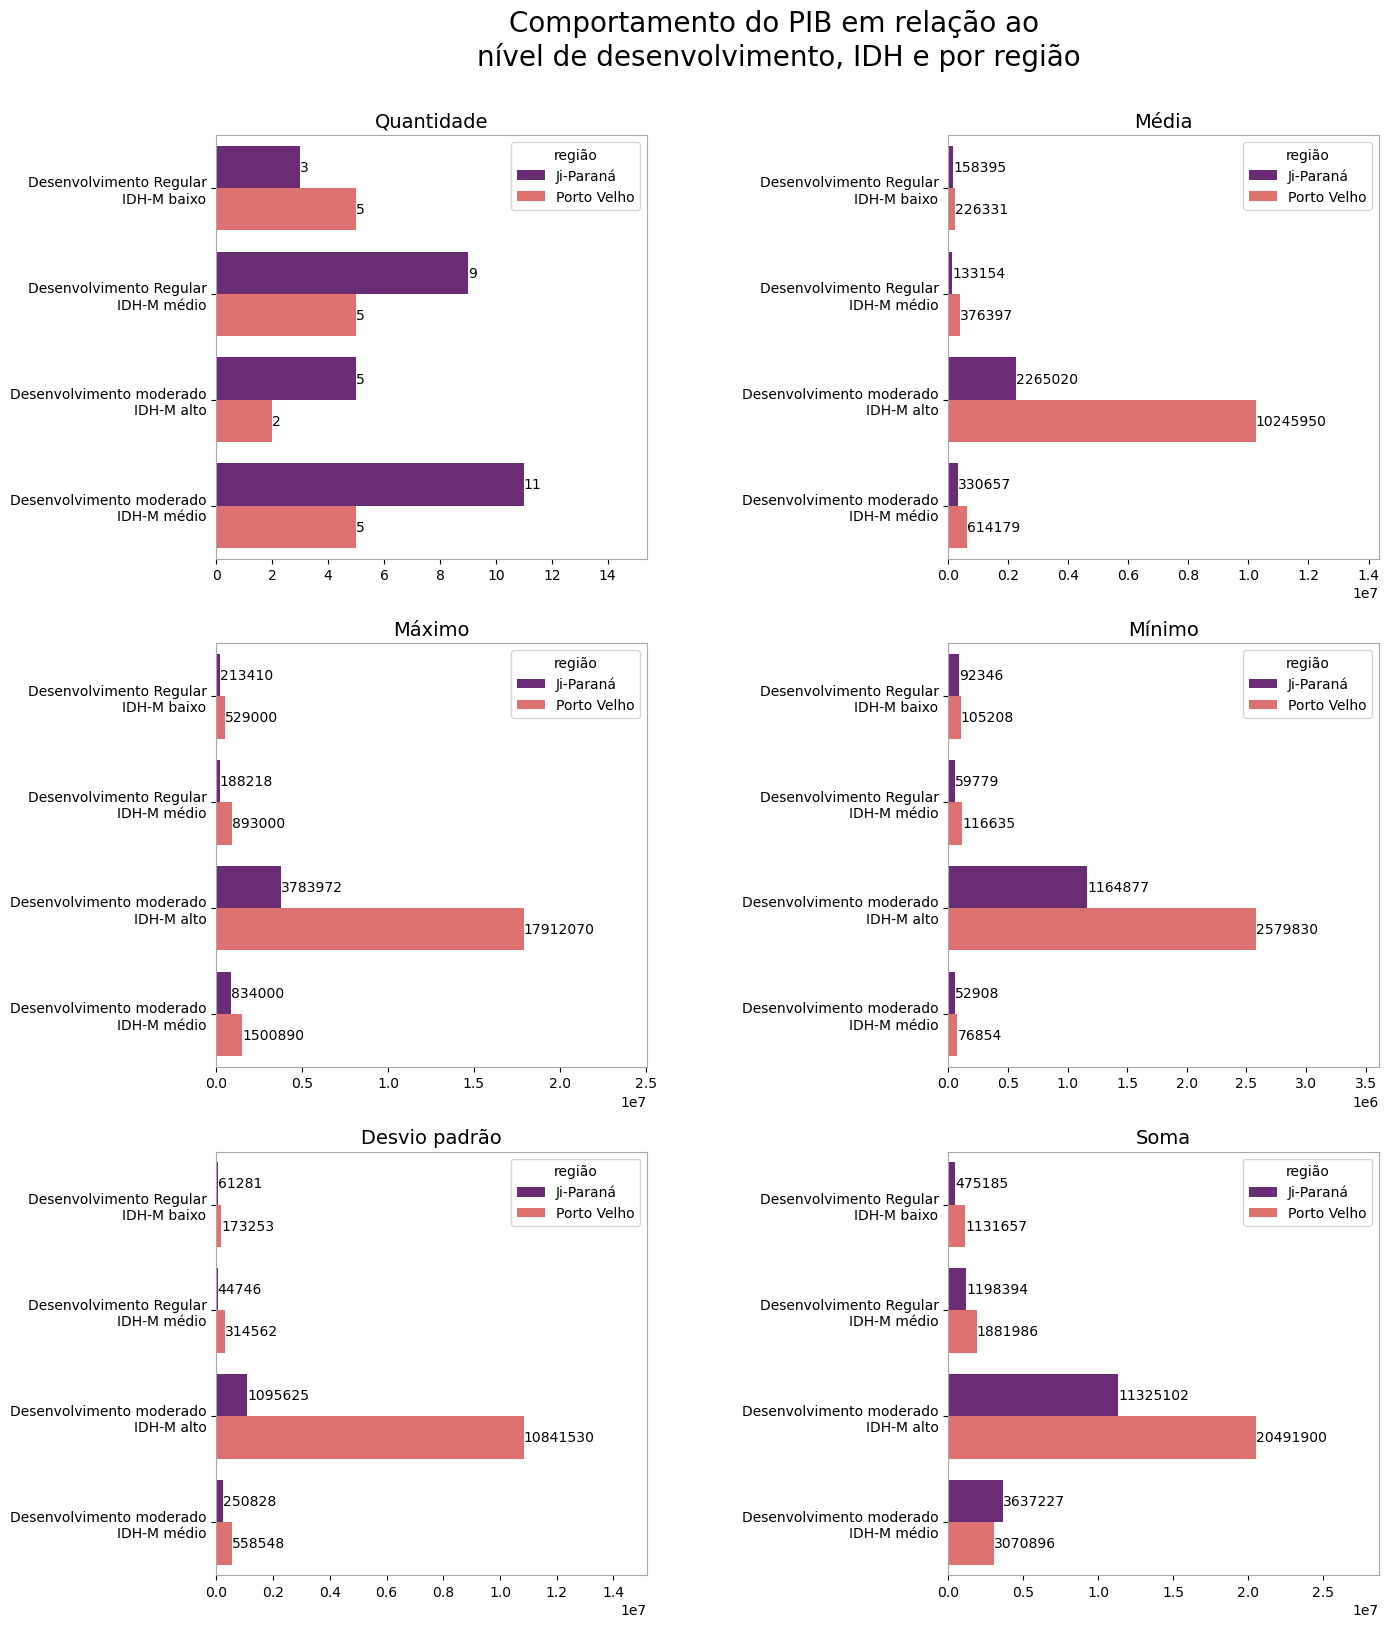

In [27]:
def imagem_pib() -> None: 

    estatistica = df_todos.groupby(['Nível_desenvolvimento','nivel_IDH','Região'])[['PIB']].agg(['count','mean','max','min','std','sum'])
    estatistica.columns = [i[1] for i in estatistica.columns]
    estatistica['index'] = [ '\n'.join(i[:2]) for i in estatistica.index]
    estatistica['região'] = [ i[2] for i in estatistica.index]
    
    figura = plt.figure(figsize=(15,18))
    estatistica = estatistica.reset_index(drop=True)
    plt.subplots_adjust(top=0.91, # Espaço entre o título e os gráficos
                        wspace = 0.7, # Espaço vertical entre os gráficos
                        hspace = 0.2) # Espaço horizontal entre os gráficos
    plt.suptitle("Comportamento do PIB em relação ao \nnível de desenvolvimento, IDH e por região", fontsize=20)
    tamanho = (3,2)
    contador = 0
    medidas = ['count','mean','max','min','std','sum']
    medidas_pt = ['Quantidade','Média','Máximo','Mínimo','Desvio padrão','Soma']
    for pos_x in range(3):
        for pos_y in range(2):
            pos = (pos_x, pos_y)
            
            #if contador == 4:
              #  ax = plt.subplot2grid(tamanho, pos, colspan=2)
            #else:
            ax = plt.subplot2grid(tamanho, pos)
            
            bar = sns.barplot(data=estatistica, y='index', x=medidas[contador],orient='h',hue='região', ax=ax, palette='magma')
            
            for i in bar.patches:
                y = i.get_xy()[1]
                x = i.get_width()
                bar.annotate(f'{int(x)}',xy=(x,y+0.2), verticalalignment='center')
            
            plt.title(f"{medidas_pt[contador]}",fontsize=14)
            bar.set(xlabel='', ylabel='')
            bar.set_xlim([0,(estatistica[medidas[contador]].max())*1.4])
            for i in ['bottom','top','left','right']:
                bar.spines[i].set_color('darkgrey')
            #if contador == 4:
                #break
            
            contador += 1
            
            
imagem_pib()

<h2>Análise de resultados</h2>
<li> Começando a análise pelas classes, vemos a separação entre desenvolvimento moderado/regular e IDH-M Baixo/Médio. Vemos que a região do ji-paraná compõe a maioria das classes, somente em desenvolvimento regular e IDH-M baixo que o porto velho se sobressai. 
<li> Olhando em relação a média, vemos que o desenvolvimento moderado tende a sobressair em relação ao regular quando se trata do valor do PIB.
<li> Sem dúvida a maior influência aparenta ser o IDH-alto, apesar que apresenta somente 2 dados presentes nessa categória, então temos que outras informações, como desvío padrão e média podem somente resumir de forma não representativa do que realmente seria a classificação.
<li> Por último, analisando a soma dos PIBs, vemos que o desenvolvimento moderado com IDH Alto é muito sobressalente em relação aos outros, e demonstra também que a região de porto velho, mesmo com menos municípios nessa região, apresentam um resultado, majoritariamente, superior.